In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import warnings
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("train.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(5)

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,admission_source,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,2,Emergency,Family/GeneralPractice,127,Discharged to home,Emergency Room,2,48,0,20,515,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,0,Emergency,?,128,Discharged/transferred to a federal health car...,Clinic Referral,14,71,0,25,38,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,1,NaN,Family/GeneralPractice,94,Discharged to home,NaN,6,60,1,22,534,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,1,Emergency,InternalMedicine,81,Discharged to home,Transfer from another health care facility,6,48,2,9,569,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,0,Elective,?,126,Discharged/transferred to home with home healt...,Physician Referral,6,47,1,15,715,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [6]:
data.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      3554
gender                                       0
age                                       3557
weight                                       0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_dia

In [7]:
for col in data:
    print(col,": ",data[col].unique())
    
    if any(data[col]==""):
        print("This columns has empty strings")
    
    print("\n ############################ \n")
 

encounter_id :  [533253 426224 634063 ... 332030 757560 459757]

 ############################ 

country :  ['USA']

 ############################ 

patient_id :  [   70110 29775006 80729253 ... 65777877 24531381  4663818]

 ############################ 

race :  ['Caucasian' 'AfricanAmerican' 'Other' nan 'Hispanic' 'Asian' '?']

 ############################ 

gender :  ['Female' 'Male' 'Unknown/Invalid']

 ############################ 

age :  ['[70-80)' '[50-60)' '[60-70)' '[80-90)' nan '[40-50)' '[20-30)' '[30-40)'
 '[90-100)' '[10-20)' '[0-10)']

 ############################ 

weight :  ['?' '[50-75)' '[100-125)' '[75-100)' '[125-150)' '[25-50)' '>200'
 '[0-25)' '[150-175)' '[175-200)']

 ############################ 

payer_code :  ['?' 'MC' 'HM' 'UN' 'SP' 'SI' 'CM' 'DM' 'CP' 'MD' 'OG' 'BC' 'PO' 'WC' 'OT'
 'MP' 'CH' 'FR']

 ############################ 

outpatient_visits_in_previous_year :  [ 0  1  2  6  5  3  4  9 36 11  7 16  8 10 12 15 13 20 27 14 35 22 24 21
 17 38 18 37 23

In [8]:
data.loc[data["race"]=="?", "race"]="unknown"
data["race"].fillna("unknown",inplace=True)

data.loc[data["gender"]=="Unknown/Invalid", "gender"]="unknown"

data.loc[data["weight"]=="?", "weight"]="unknown"

data.loc[data["race"]=="?", "race"]="unknown"

data["age"].fillna("unknown",inplace=True)

data.loc[data["payer_code"]=="?", "payer_code"]="unknown"
data.loc[data["payer_code"]=="?", "payer_code"]="unknown"

data["admission_type"].fillna("unknown",inplace=True)
data.loc[data["admission_type"]=="Not Available", "admission_type"]="unknown"
data.loc[data["admission_type"]=="Not Mapped", "admission_type"]="unknown"

data.loc[data["medical_specialty"]=="?", "medical_specialty"]="unknown"
data.loc[data["medical_specialty"]=="PhysicianNotFound", "medical_specialty"]="unknown"

data["discharge_disposition"].fillna("unknown",inplace=True)
data.loc[data["discharge_disposition"]=="Not Mapped", "discharge_disposition"]="unknown"

data["admission_source"].fillna("unknown",inplace=True)
data["admission_source"]=data["admission_source"].str.lstrip()
data.loc[data["admission_source"]==" Not Mapped", "admission_source"]="unknown"
data.loc[data["admission_source"]==" Not Available", "admission_source"]="unknown"

data.loc[data["medication"]=="[]", "medication"]="unknown"

data["glucose_test_result"].fillna("unknown",inplace=True)

data["a1c_test_result"].fillna("unknown",inplace=True)

In [9]:
data.loc[data["change_in_meds_during_hospitalization"]=="No", "change_in_meds_during_hospitalization"]=False
data.loc[data["change_in_meds_during_hospitalization"]=="Ch", "change_in_meds_during_hospitalization"]=True
data["change_in_meds_during_hospitalization"]=data["change_in_meds_during_hospitalization"].astype("boolean")

data.loc[data["prescribed_diabetes_meds"]=="No", "prescribed_diabetes_meds"]=False
data.loc[data["prescribed_diabetes_meds"]=="Yes", "prescribed_diabetes_meds"]=True
data["prescribed_diabetes_meds"]=data["prescribed_diabetes_meds"].astype("boolean")

data.loc[data["readmitted_binary"]=="Yes","readmitted_binary"]=True
data.loc[data["readmitted_binary"]=="No","readmitted_binary"]=False
data["readmitted_binary"]=data["readmitted_binary"].astype("boolean")

data.loc[data["readmitted_multiclass"]==">30 days","readmitted_multiclass"]="0"
data.loc[data["readmitted_multiclass"]=="<30 days","readmitted_multiclass"]="1"
data.loc[data["readmitted_multiclass"]=="No","readmitted_multiclass"]="2"

In [10]:
data.drop("country",axis=1,inplace=True)
data.set_index("encounter_id",inplace=True)

In [11]:
unique_specs=[]
data_specs=data.copy()

for specs in data_specs["medical_specialty"].unique():
    
    if "/" not in specs and "-" not in specs and "&" not in specs and "and" not in specs:
        
        if specs not in unique_specs and specs!="unknown":
            
            unique_specs.append(specs)
            data_specs[specs]=np.nan
    
    if "/" in specs and "-" not in specs and "&" not in specs and "and" not in specs:
        
        specs=specs.split("/")
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
                
    if "/" not in specs and "-" in specs and "&" not in specs and "and" not in specs:
        
        specs=specs.split("-")
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
    
    if "/" not in specs and "-" not in specs and "&" in specs and "and" not in specs:
        
        specs=specs.split("&")
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
                
    if "/" not in specs and "-" not in specs and "&" not in specs and "and" in specs:
        
        specs=specs.split("and")
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
                    
    if "/" in specs and "-" in specs and "&" not in specs and "and" not in specs:
        
        temp=specs.split("/")
        specs=[]
        
        for element in temp:
            
            if "-" in element:
                
                element=element.split("-")
                
                for spec in element:
                    
                    specs.append(spec)
            else:
                
                specs.append(element)
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
    
    
    if "/" not in specs and "-" in specs and "&" in specs and "and" not in specs:
        
        temp=specs.split("&")
        specs=[]
        
        for element in temp:
            
            if "-" in element:
                
                element=element.split("-")
                
                for spec in element:
                    
                    specs.append(spec)
            else:
                
                specs.append(element)
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
                
                
    if "/" not in specs and "-" in specs and "&" not in specs and "and" in specs:
        
        temp=specs.split("and")
        specs=[]
        
        for element in temp:
            
            if "-" in element:
                
                element=element.split("-")
                
                for spec in element:
                    
                    specs.append(spec)
            else:
                
                specs.append(element)
        
        for spec in specs:
            
            if spec not in unique_specs:
                
                unique_specs.append(spec)
                data_specs[spec]=np.nan
    

for ind in data_specs.index:
    
    if "unknown" in data_specs["medical_specialty"].loc[ind]:
        
        for spec in unique_specs:
            
            data_specs[spec].loc[ind]="unknown"
    else:
        
        for spec in unique_specs:

            if spec in data_specs["medical_specialty"].loc[ind]:

                data_specs[spec].loc[ind]=True

            if spec not in data_specs["medical_specialty"].loc[ind]:

                data_specs[spec].loc[ind]=False
        

data_specs.drop("medical_specialty",axis=1,inplace=True)

In [12]:

unique_meds=[]
data_med=data.copy()

for medications in data["medication"].unique():
    
    meds=medications.replace(" ","").replace("[", "").replace("]", "").replace("'", "").split(",")
    
    for med in meds:
        
        if med not in unique_meds and med!="unknown":
            
            unique_meds.append(med)
            data_med[med]=np.nan

data_med["medication"]=data_med["medication"].apply(lambda x: x.replace(" ","").replace("[", "").replace("]", "").replace("'", "").split(","))

for ind in data_med.index:
    
    if "unknown" in data_med["medication"].loc[ind]:
        
        for med in unique_meds:
            
            data_med[med].loc[ind]="unknown"
    else:
        
        for med in unique_meds:

            if med in data_med["medication"].loc[ind]:

                data_med[med].loc[ind]=True

            if med not in data_med["medication"].loc[ind]:

                data_med[med].loc[ind]=False
        

data_med.drop("medication",axis=1,inplace=True)

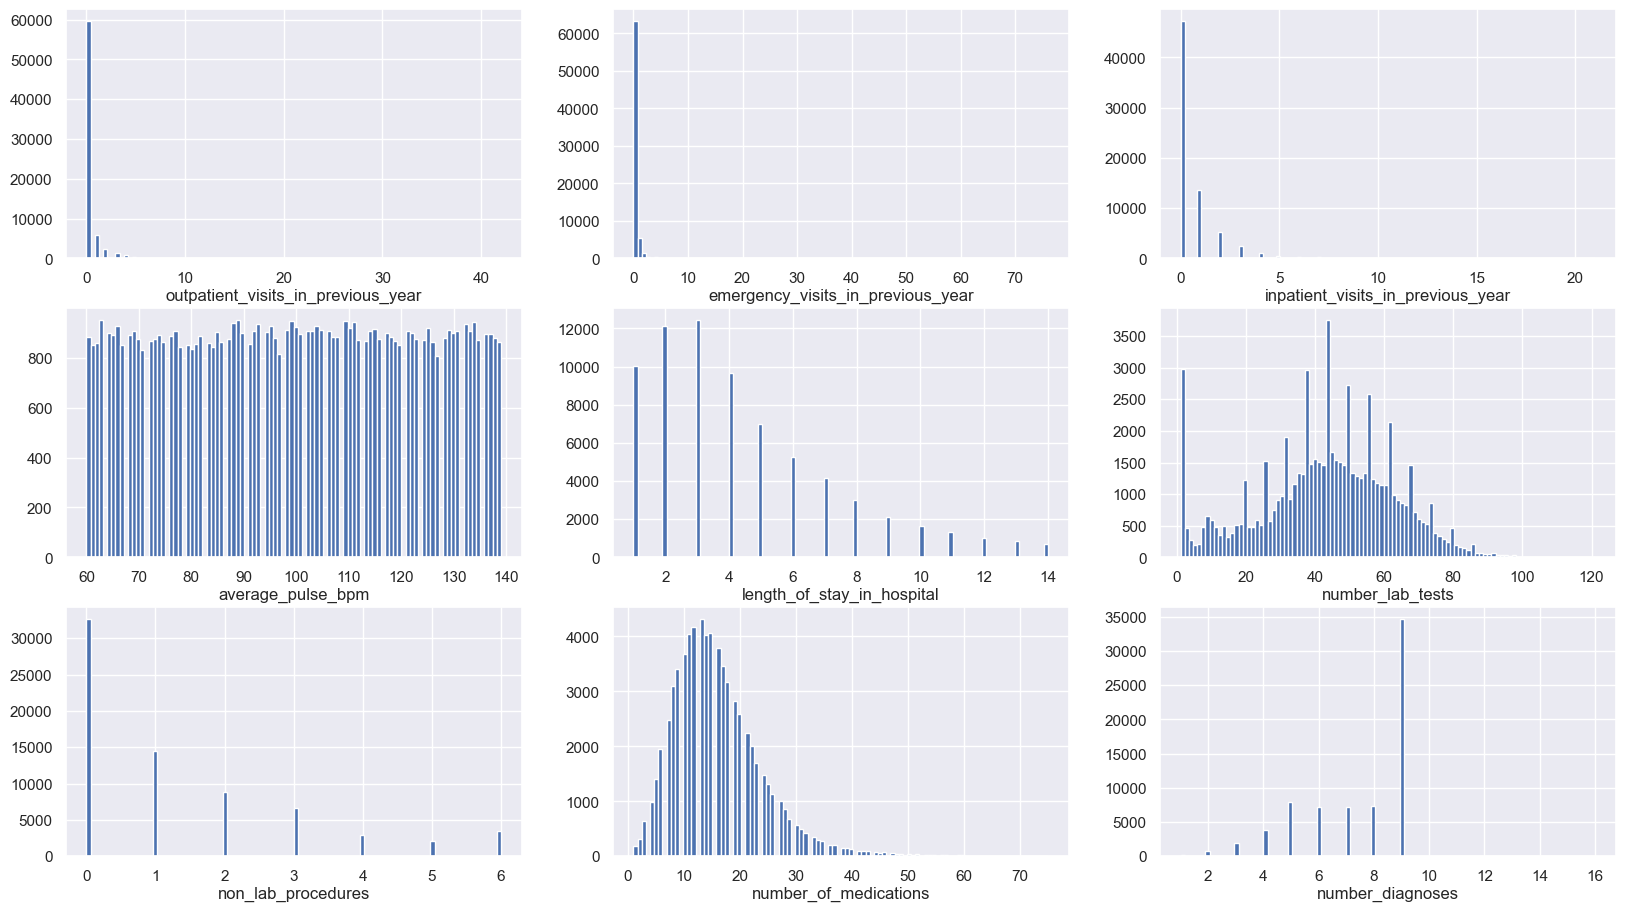

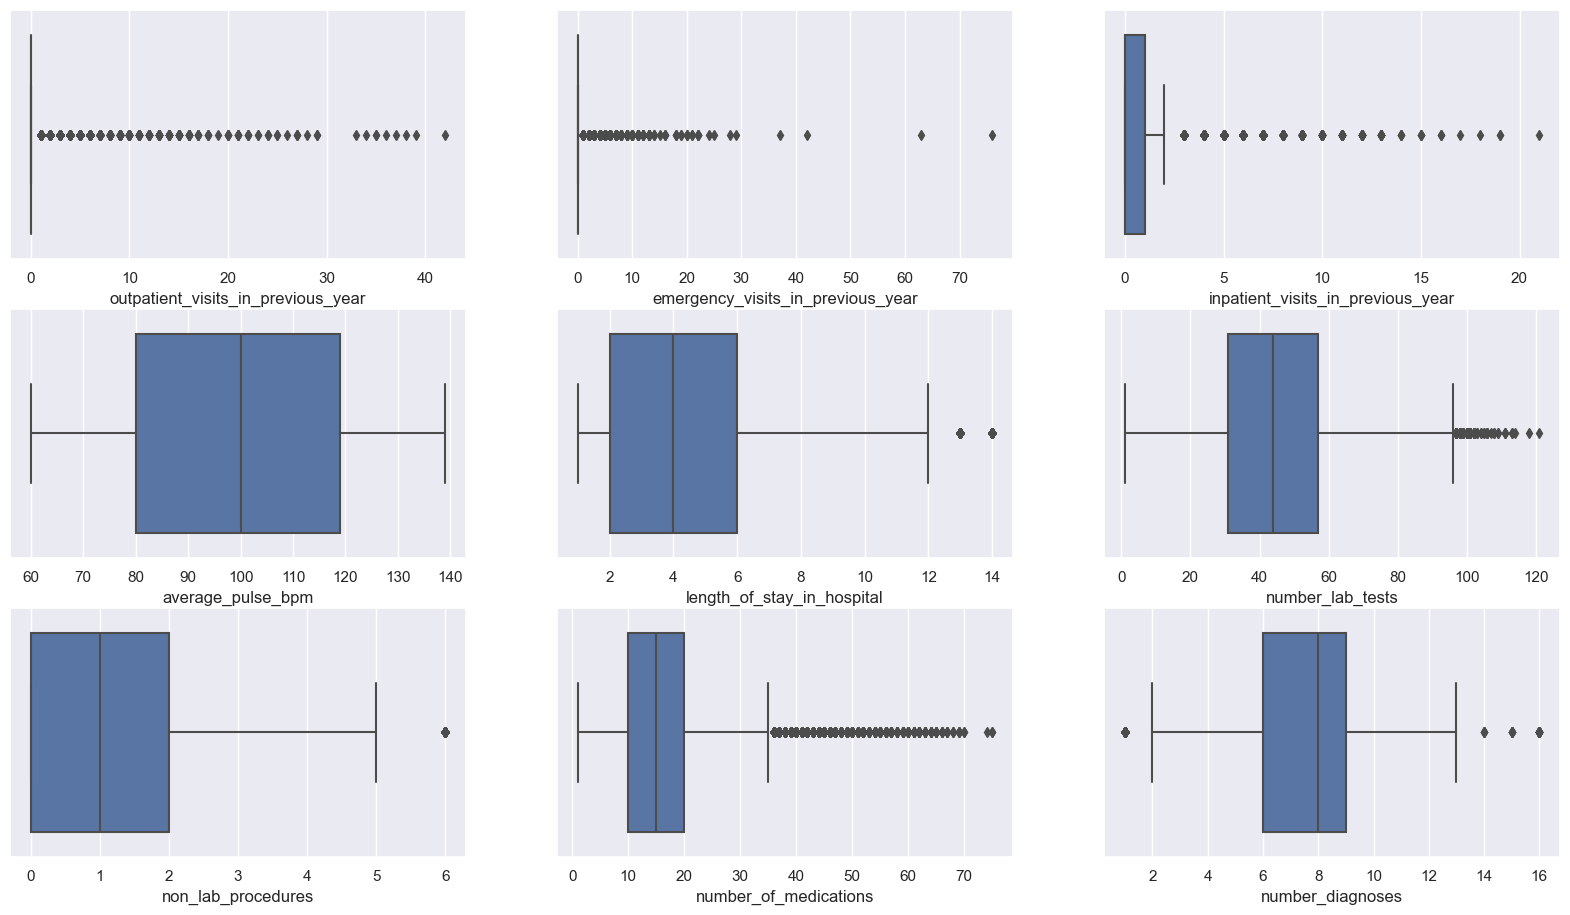

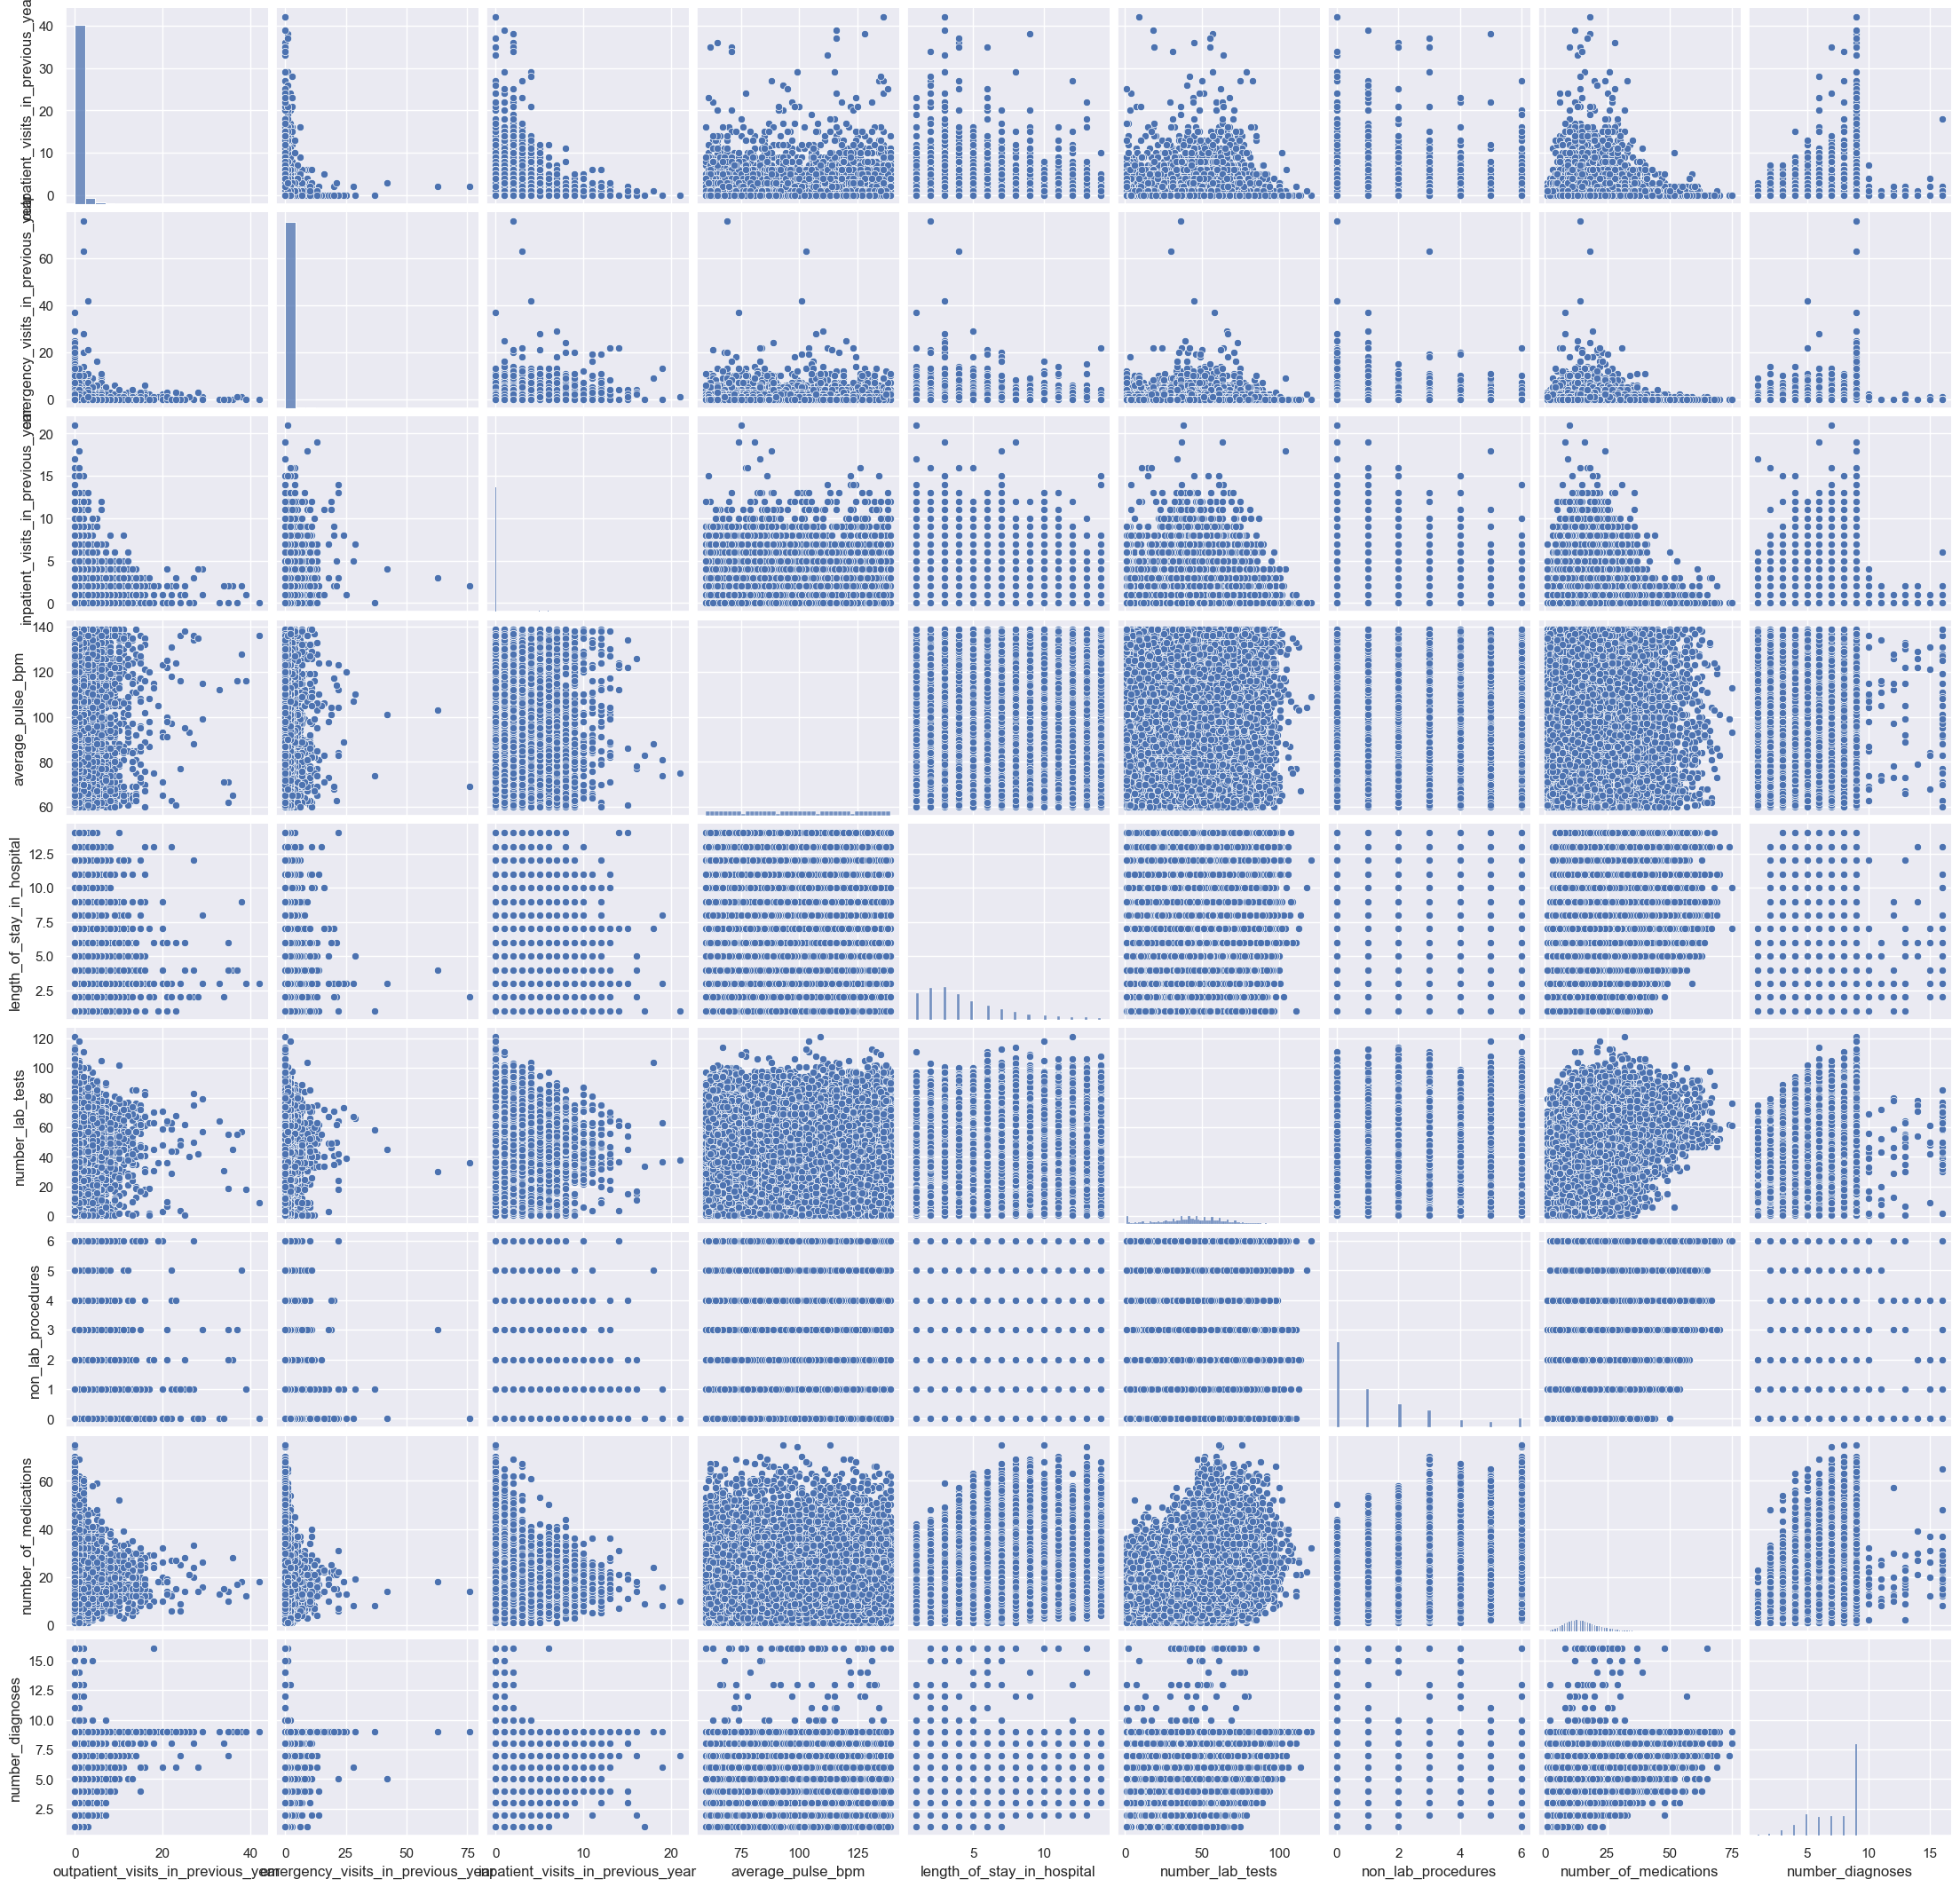

,count,mean,std,min,25%,50%,75%,max
outpatient_visits_in_previous_year,71236.0,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0
average_pulse_bpm,71236.0,99.611222,23.040521,60.0,80.0,100.0,119.0,139.0
length_of_stay_in_hospital,71236.0,4.391024,2.988739,1.0,2.0,4.0,6.0,14.0
number_lab_tests,71236.0,43.095654,19.642919,1.0,31.0,44.0,57.0,121.0
non_lab_procedures,71236.0,1.340923,1.706664,0.0,0.0,1.0,2.0,6.0
number_of_medications,71236.0,15.995452,8.122347,1.0,10.0,15.0,20.0,75.0
number_diagnoses,71236.0,7.421023,1.937809,1.0,6.0,8.0,9.0,16.0


In [22]:
num_feat=data.select_dtypes(include=np.number).set_index(data.index)
num_feat.drop("patient_id",axis=1,inplace=True)

sns.set()

fig, axes = plt.subplots(3,ceil(len(num_feat.columns)/3),figsize=(20, 11))

for ax, feat in zip(axes.flatten(),num_feat.columns):
    ax.hist(num_feat[feat],bins=100)
    ax.set_title(feat, y=-0.2)
plt.show()

fig, axes = plt.subplots(3,ceil(len(num_feat.columns)/3),figsize=(20, 11))

for ax, feat in zip(axes.flatten(),num_feat.columns):
    sns.boxplot(x=num_feat[feat],ax=ax)

plt.show()

sns.pairplot(num_feat[num_feat.columns], diag_kind="hist")

plt.subplots_adjust(top=0.95)

plt.show()

num_feat.describe(include="all").T

In [13]:
y=["readmitted_binary","readmitted_multiclass"]
X=data.drop(y,axis=1)
X_med=data_med.drop(y,axis=1)
X_specs=data_specs.drop(y,axis=1)
y_1=data["readmitted_binary"]
y_2=data["readmitted_multiclass"]

X_1_train, X_1_val, y_1_train, y_1_val=train_test_split(X,y_1,test_size=0.3,random_state=0,stratify=y_1,shuffle=True)
X_2_train, X_2_val, y_2_train, y_2_val=train_test_split(X,y_2,test_size=0.3,random_state=0,stratify=y_2,shuffle=True)

X_med_1_train, X_med_1_val, y_med_1_train, y_med_1_val=train_test_split(X_med,y_1,test_size=0.3,random_state=0,stratify=y_1,shuffle=True)
X_med_2_train, X_med_2_val, y_med_2_train, y_med_2_val=train_test_split(X_med,y_2,test_size=0.3,random_state=0,stratify=y_2,shuffle=True)

X_specs_1_train, X_specs_1_val, y_specs_1_train, y_specs_1_val=train_test_split(X_specs,y_1,test_size=0.3,random_state=0,stratify=y_1,shuffle=True)
X_specs_2_train, X_specs_2_val, y_specs_2_train, y_specs_2_val=train_test_split(X_specs,y_2,test_size=0.3,random_state=0,stratify=y_2,shuffle=True)

In [14]:
X_1_train_num=X_1_train.select_dtypes(include=np.number).set_index(X_1_train.index)
X_1_train_num.drop("patient_id",axis=1,inplace=True)
X_2_train_num=X_2_train.select_dtypes(include=np.number).set_index(X_2_train.index)
X_2_train_num.drop("patient_id",axis=1,inplace=True)

X_1_val_num=X_1_val.select_dtypes(include=np.number).set_index(X_1_val.index)
X_1_val_num.drop("patient_id",axis=1,inplace=True)
X_2_val_num=X_2_val.select_dtypes(include=np.number).set_index(X_2_val.index)
X_2_val_num.drop("patient_id",axis=1,inplace=True)

X_1_train_cat=X_1_train.select_dtypes(exclude=np.number).set_index(X_1_train.index)
X_2_train_cat=X_2_train.select_dtypes(exclude=np.number).set_index(X_2_train.index)

X_1_val_cat=X_1_val.select_dtypes(exclude=np.number).set_index(X_1_val.index)
X_2_val_cat=X_1_val.select_dtypes(exclude=np.number).set_index(X_2_val.index)

###################################################################################################

X_med_1_train_num=X_med_1_train.select_dtypes(include=np.number).set_index(X_med_1_train.index)
X_med_1_train_num.drop("patient_id",axis=1,inplace=True)
X_med_2_train_num=X_med_2_train.select_dtypes(include=np.number).set_index(X_med_2_train.index)
X_med_2_train_num.drop("patient_id",axis=1,inplace=True)

X_med_1_val_num=X_med_1_val.select_dtypes(include=np.number).set_index(X_med_1_val.index)
X_med_1_val_num.drop("patient_id",axis=1,inplace=True)
X_med_2_val_num=X_med_2_val.select_dtypes(include=np.number).set_index(X_med_2_val.index)
X_med_2_val_num.drop("patient_id",axis=1,inplace=True)

X_med_1_train_cat=X_med_1_train.select_dtypes(exclude=np.number).set_index(X_med_1_train.index)
X_med_2_train_cat=X_med_2_train.select_dtypes(exclude=np.number).set_index(X_med_2_train.index)

X_med_1_val_cat=X_med_1_val.select_dtypes(exclude=np.number).set_index(X_med_1_val.index)
X_med_2_val_cat=X_med_1_val.select_dtypes(exclude=np.number).set_index(X_med_2_val.index)

####################################################################################################

X_specs_1_train_num=X_specs_1_train.select_dtypes(include=np.number).set_index(X_specs_1_train.index)
X_specs_1_train_num.drop("patient_id",axis=1,inplace=True)
X_specs_2_train_num=X_specs_2_train.select_dtypes(include=np.number).set_index(X_specs_2_train.index)
X_specs_2_train_num.drop("patient_id",axis=1,inplace=True)

X_specs_1_val_num=X_specs_1_val.select_dtypes(include=np.number).set_index(X_specs_1_val.index)
X_specs_1_val_num.drop("patient_id",axis=1,inplace=True)
X_specs_2_val_num=X_specs_2_val.select_dtypes(include=np.number).set_index(X_specs_2_val.index)
X_specs_2_val_num.drop("patient_id",axis=1,inplace=True)

X_specs_1_train_cat=X_specs_1_train.select_dtypes(exclude=np.number).set_index(X_specs_1_train.index)
X_specs_2_train_cat=X_specs_2_train.select_dtypes(exclude=np.number).set_index(X_specs_2_train.index)

X_specs_1_val_cat=X_specs_1_val.select_dtypes(exclude=np.number).set_index(X_specs_1_val.index)
X_specs_2_val_cat=X_specs_1_val.select_dtypes(exclude=np.number).set_index(X_specs_2_val.index)

In [15]:
scaler = MinMaxScaler()

scaler.fit(X_1_train_num)
X_1_train_num_scaled=scaler.transform(X_1_train_num)
X_1_train_num_scaled=pd.DataFrame(X_1_train_num_scaled, columns=X_1_train_num.columns).set_index(X_1_train_num.index)
X_1_val_num_scaled=scaler.transform(X_1_val_num)
X_1_val_num_scaled=pd.DataFrame(X_1_val_num_scaled, columns=X_1_val_num.columns).set_index(X_1_val_num.index)

scaler.fit(X_2_train_num)
X_2_train_num_scaled=scaler.transform(X_2_train_num)
X_2_train_num_scaled=pd.DataFrame(X_2_train_num_scaled, columns=X_2_train_num.columns).set_index(X_2_train_num.index)
X_2_val_num_scaled=scaler.transform(X_2_val_num)
X_2_val_num_scaled=pd.DataFrame(X_2_val_num_scaled, columns=X_2_val_num.columns).set_index(X_2_val_num.index)

###########################################################################################################################

scaler.fit(X_med_1_train_num)
X_med_1_train_num_scaled=scaler.transform(X_med_1_train_num)
X_med_1_train_num_scaled=pd.DataFrame(X_med_1_train_num_scaled, columns=X_med_1_train_num.columns).set_index(X_med_1_train_num.index)
X_med_1_val_num_scaled=scaler.transform(X_med_1_val_num)
X_med_1_val_num_scaled=pd.DataFrame(X_med_1_val_num_scaled, columns=X_med_1_val_num.columns).set_index(X_med_1_val_num.index)

scaler.fit(X_med_2_train_num)
X_med_2_train_num_scaled=scaler.transform(X_med_2_train_num)
X_med_2_train_num_scaled=pd.DataFrame(X_med_2_train_num_scaled, columns=X_med_2_train_num.columns).set_index(X_med_2_train_num.index)
X_med_2_val_num_scaled=scaler.transform(X_med_2_val_num)
X_med_2_val_num_scaled=pd.DataFrame(X_med_2_val_num_scaled, columns=X_med_2_val_num.columns).set_index(X_med_2_val_num.index)

##############################################################################################################################

scaler.fit(X_specs_1_train_num)
X_specs_1_train_num_scaled=scaler.transform(X_specs_1_train_num)
X_specs_1_train_num_scaled=pd.DataFrame(X_specs_1_train_num_scaled, columns=X_specs_1_train_num.columns).set_index(X_specs_1_train_num.index)
X_specs_1_val_num_scaled=scaler.transform(X_specs_1_val_num)
X_specs_1_val_num_scaled=pd.DataFrame(X_specs_1_val_num_scaled, columns=X_specs_1_val_num.columns).set_index(X_specs_1_val_num.index)

scaler.fit(X_specs_2_train_num)
X_specs_2_train_num_scaled=scaler.transform(X_specs_2_train_num)
X_specs_2_train_num_scaled=pd.DataFrame(X_specs_2_train_num_scaled, columns=X_specs_2_train_num.columns).set_index(X_specs_2_train_num.index)
X_specs_2_val_num_scaled=scaler.transform(X_specs_2_val_num)
X_specs_2_val_num_scaled=pd.DataFrame(X_specs_2_val_num_scaled, columns=X_specs_2_val_num.columns).set_index(X_specs_2_val_num.index)

In [16]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data=cor,annot=True,cmap=plt.cm.Reds,fmt='.1')
    plt.show()

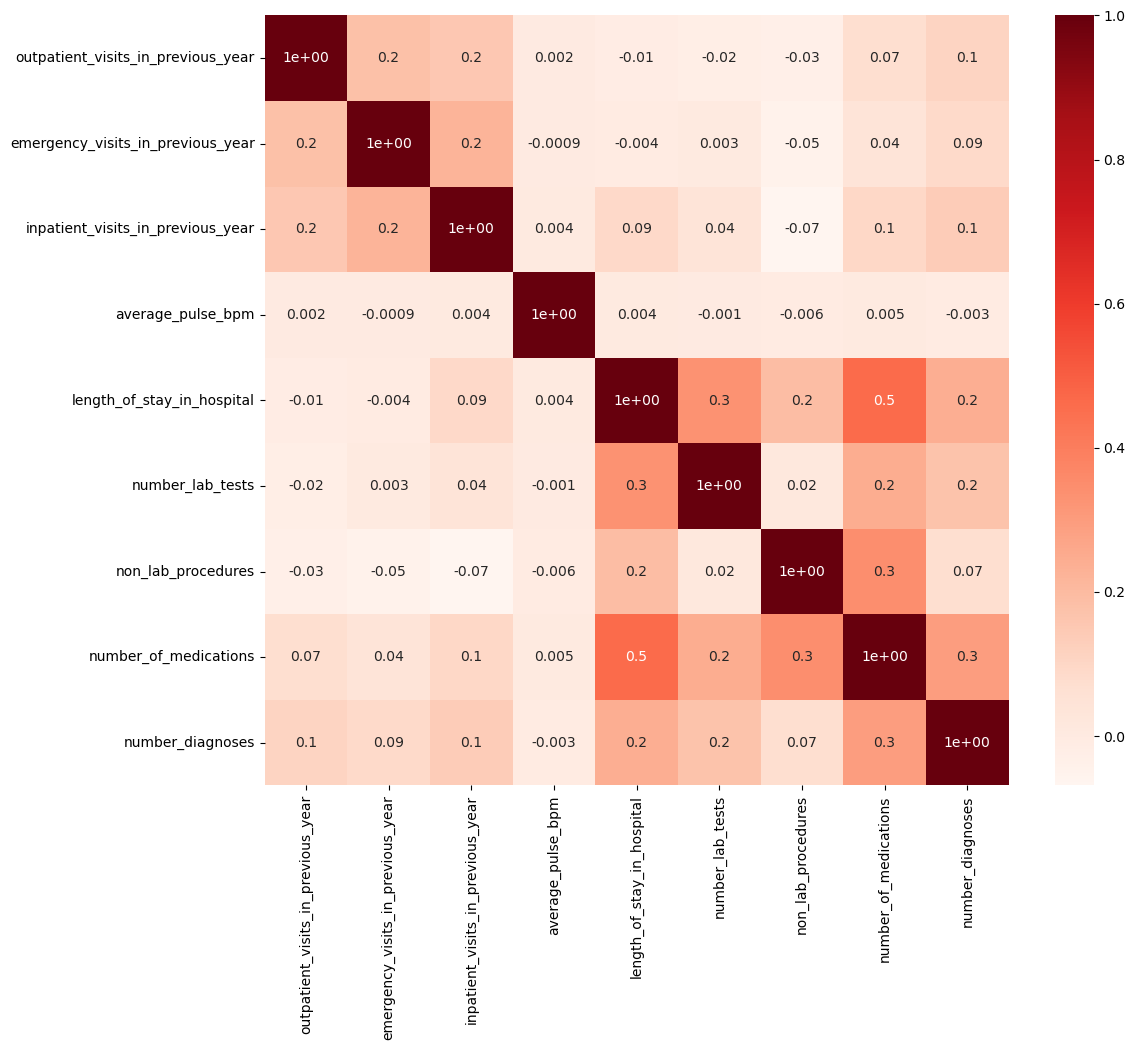

In [17]:
cor_spearman_1=X_1_train_num_scaled.corr(method ='spearman')
cor_spearman_2=X_2_train_num_scaled.corr(method ='spearman')

cor_heatmap(cor_spearman_1)


In [18]:
def ideal_feat_num_rfe(num_feat,selec_model,X_train_num_scaled,y_train,X_val_num_scaled,y_val):
    
    nof_list=np.arange(1,num_feat+1)            
    high_score=0
    nof=0           
    train_score_list=[]
    val_score_list=[]

    for n in range(len(nof_list)):

        model=selec_model

        rfe=RFE(estimator=model,n_features_to_select=nof_list[n])
        X_train_rfe=rfe.fit_transform(X_train_num_scaled,y_train)
        X_val_rfe=rfe.transform(X_val_num_scaled)
        model.fit(X_train_rfe,y_train)

        train_score=model.score(X_train_rfe,y_train)
        train_score_list.append(train_score)

        val_score=model.score(X_val_rfe,y_val)
        val_score_list.append(val_score)

        if(val_score>=high_score):
            high_score=val_score
            nof=nof_list[n]
            features_to_select=pd.Series(rfe.support_, index=X_train_num_scaled.columns)
            rank=rfe.ranking_

    print("Optimum number of features: %d" %nof)
    print("Score with %d features: %f" % (nof, high_score))
    print(f"Features to select: \n{features_to_select}")

def num_feat_selec(num_feat,selec_model,X_train_num_scaled,y_train):
    
    rfe=RFE(estimator=selec_model,n_features_to_select=num_feat)
    X_rfe=rfe.fit_transform(X=X_train_num_scaled,y=y_train)
    
    for col,Bool,rank in zip(X_train_num_scaled.columns,rfe.support_,rfe.ranking_):
        
        print(col,":")
        print(" -Relevant: ",Bool)
        print(" -Ranking: ",rank)
        print("\n")
        

def plot_importance(coef,name):
    
    print("Lasso picked "+str(sum(coef!=0))+" variables and eliminated the other "+str(sum(coef==0))+" variables")
    print("\n")
    imp_coef=coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind="barh")
    plt.title("Feature importance using "+name+" Model")
    plt.show()

    
def ideal_feat_num_embeded(selec_model,X_train_num_scaled,y_train):
    
    selec_model.fit(X_train_num_scaled,y_train)
    coef=pd.Series(selec_model.coef_,index=X_train_num_scaled.columns)
    coef.sort_values()
    plot_importance(coef,'Lasso')
    
    
def TestIndependence(X,y,var,alpha=0.05):

    dfObserved=pd.crosstab(y,X) 
    chi2,p,dof,expected=stats.chi2_contingency(dfObserved.values)
    dfExpected=pd.DataFrame(expected,columns=dfObserved.columns,index=dfObserved.index)

    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [19]:
model_bi_1=LogisticRegression()
model_bi_2=SVC(kernel='linear')
model_bi_3=LassoCV()
model_bi_4=RandomForestClassifier()
model_multi_1=LogisticRegression(multi_class="ovr")
model_multi_2=LogisticRegression(multi_class="multinomial")
model_multi_3=LassoCV()
model_multi_4=RandomForestClassifier()

In [24]:
ideal_feat_num_rfe(9,model_multi_4,X_2_train_num_scaled,y_2_train,X_2_val_num_scaled,y_2_val)

Optimum number of features: 1
Score with 1 features: 0.539142
Features to select: 
outpatient_visits_in_previous_year    False
emergency_visits_in_previous_year     False
inpatient_visits_in_previous_year     False
average_pulse_bpm                      True
length_of_stay_in_hospital            False
number_lab_tests                      False
non_lab_procedures                    False
number_of_medications                 False
number_diagnoses                      False
dtype: bool


In [20]:

print("readmitted binary model 1:")
ideal_feat_num_rfe(9,model_bi_1,X_1_train_num_scaled,y_1_train,X_1_val_num_scaled,y_1_val)
print("\n")
#print("readmitted binary model 2:")
#ideal_feat_num_rfe(9,model_bi_2,X_1_train_num_scaled,y_1_train,X_1_val_num_scaled,y_1_val)
#print("\n")
print("readmitted multiclass model 1:")
ideal_feat_num_rfe(9,model_multi_1,X_2_train_num_scaled,y_2_train,X_2_val_num_scaled,y_2_val)
print("\n")
print("readmitted multiclass model 2:")
ideal_feat_num_rfe(9,model_multi_2,X_2_train_num_scaled,y_2_train,X_2_val_num_scaled,y_2_val)

readmitted binary model 1:
Optimum number of features: 7
Score with 7 features: 0.888962
Features to select: 
outpatient_visits_in_previous_year     True
emergency_visits_in_previous_year      True
inpatient_visits_in_previous_year      True
average_pulse_bpm                     False
length_of_stay_in_hospital             True
number_lab_tests                      False
non_lab_procedures                     True
number_of_medications                  True
number_diagnoses                       True
dtype: bool


readmitted multiclass model 1:
Optimum number of features: 8
Score with 8 features: 0.564316
Features to select: 
outpatient_visits_in_previous_year     True
emergency_visits_in_previous_year      True
inpatient_visits_in_previous_year      True
average_pulse_bpm                     False
length_of_stay_in_hospital             True
number_lab_tests                       True
non_lab_procedures                     True
number_of_medications                  True
number_diagnos

Lasso picked 9 variables and eliminated the other 0 variables




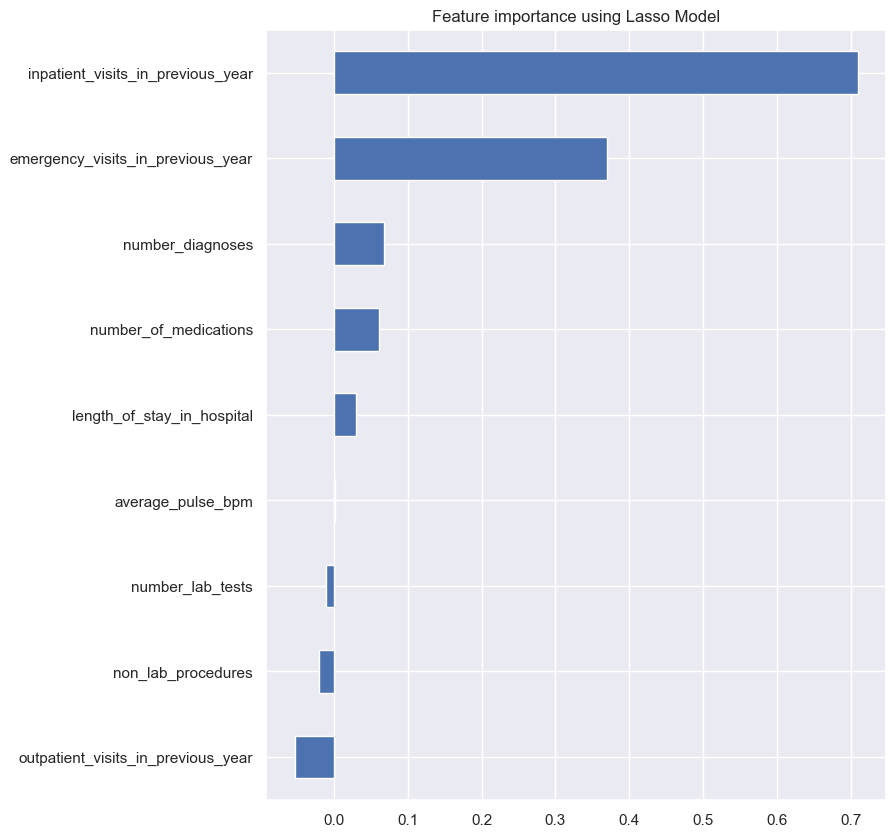

Lasso picked 9 variables and eliminated the other 0 variables




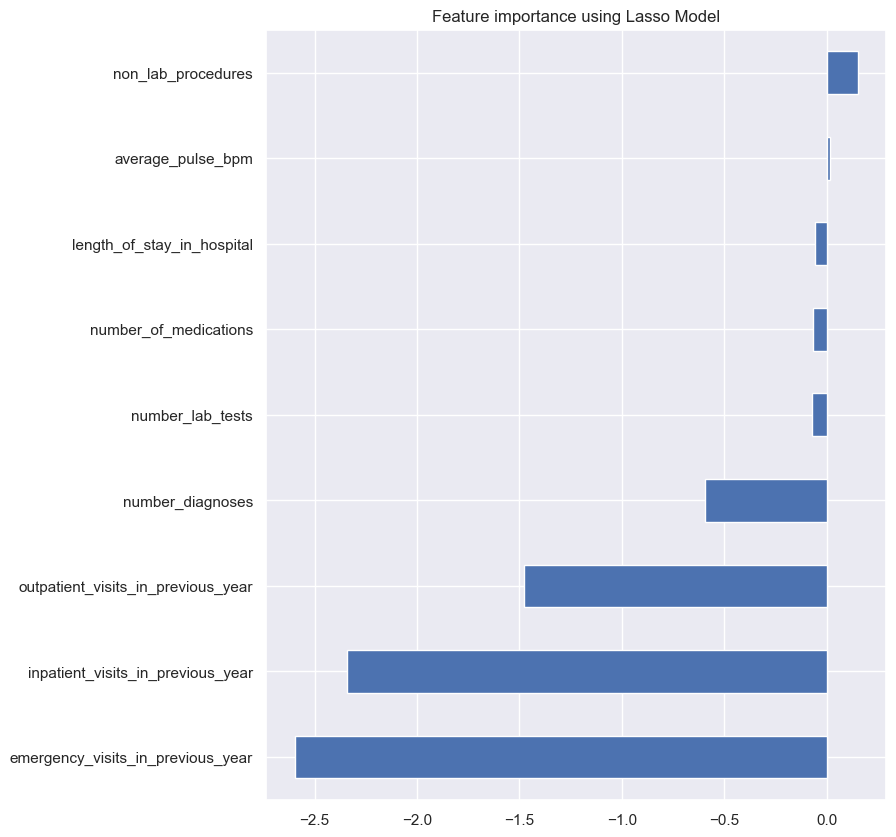

In [23]:
ideal_feat_num_embeded(model_bi_3,X_1_train_num_scaled,y_1_train)
ideal_feat_num_embeded(model_multi_3,X_2_train_num_scaled,y_2_train)

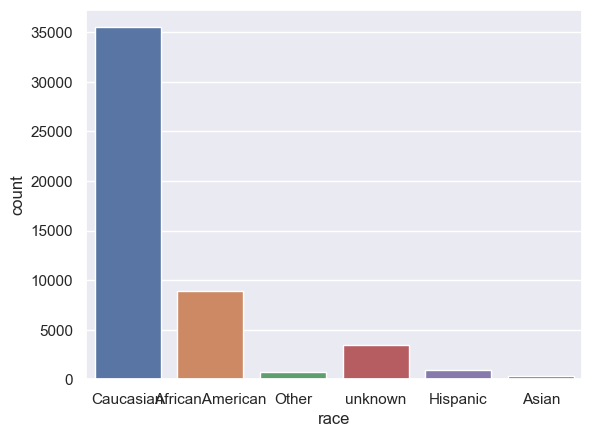

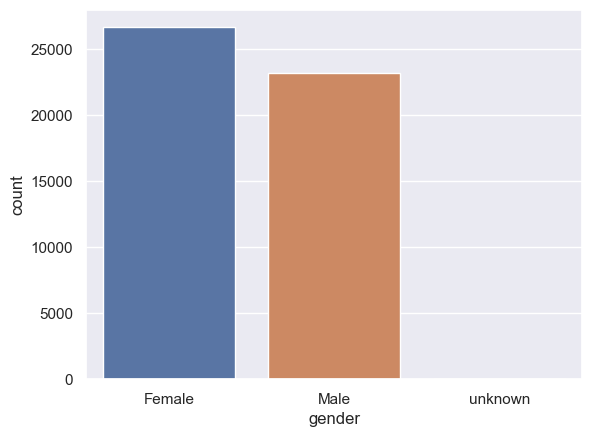

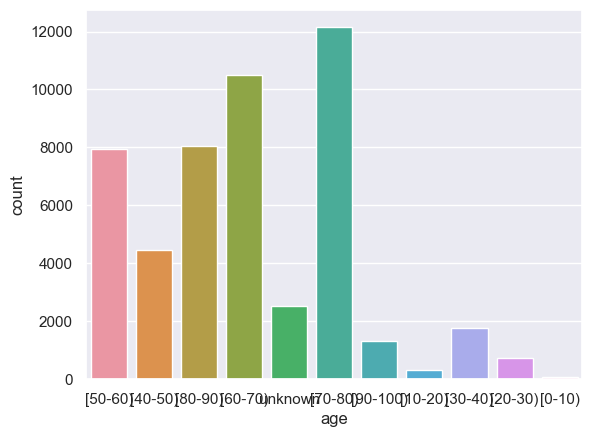

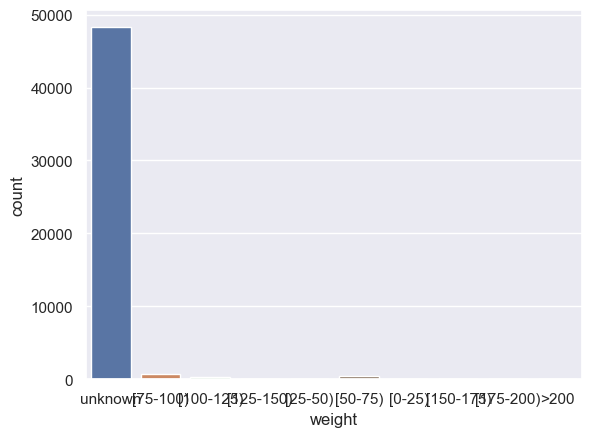

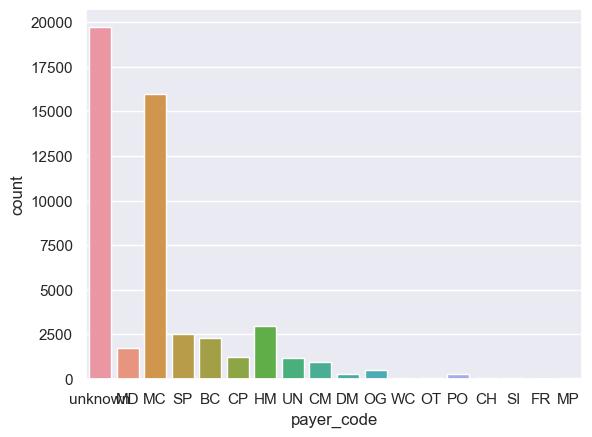

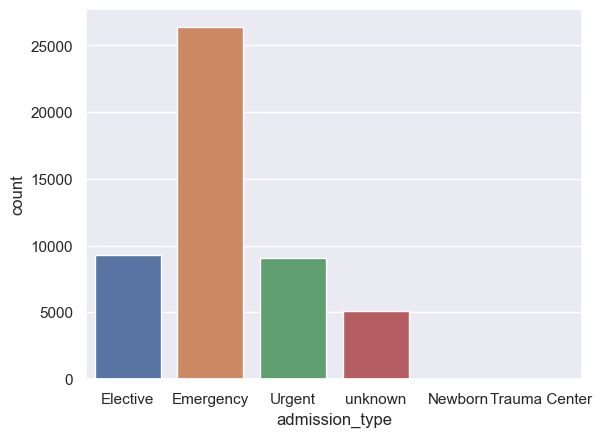

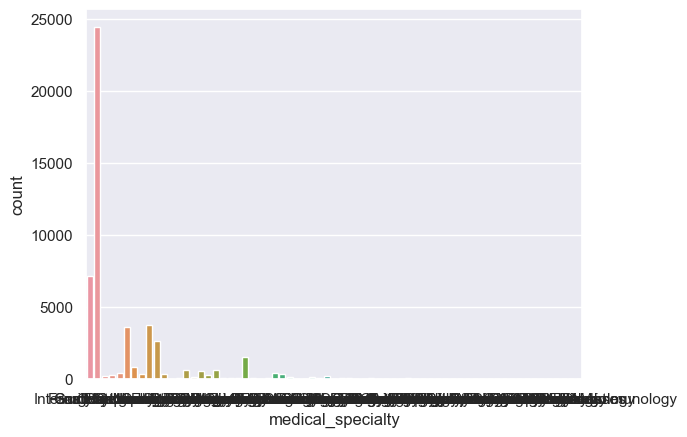

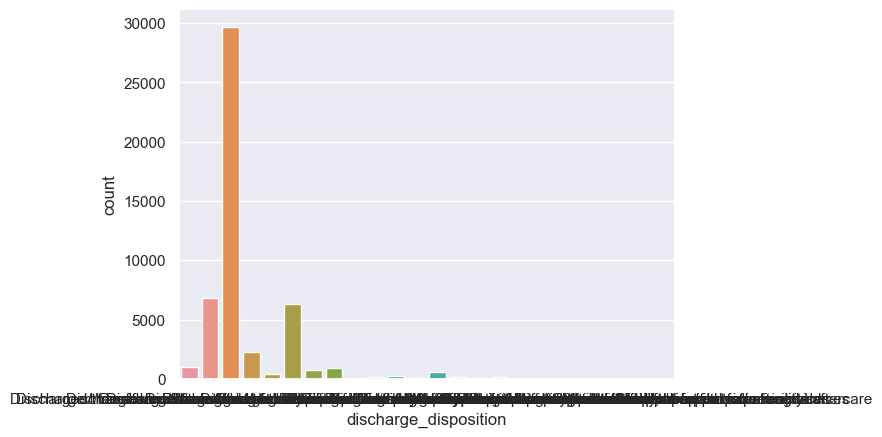

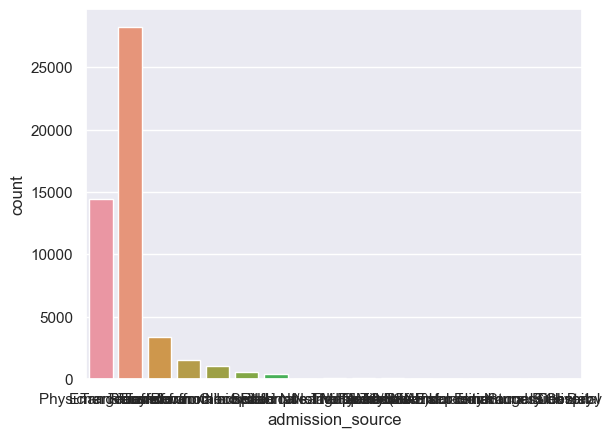

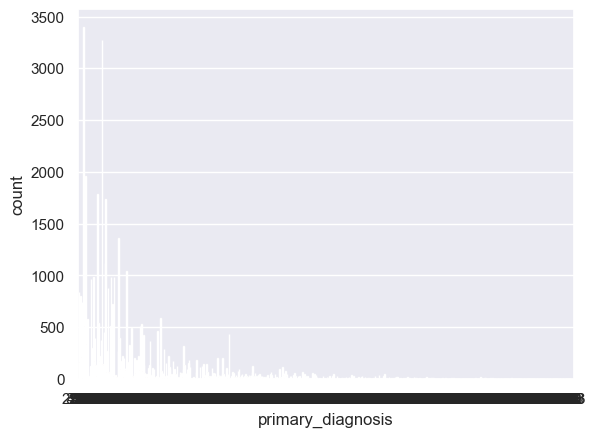

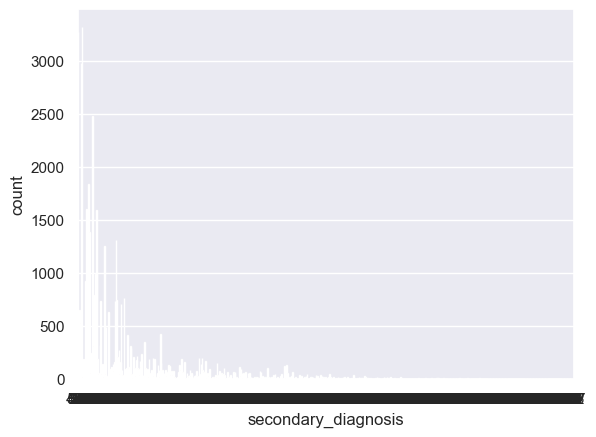

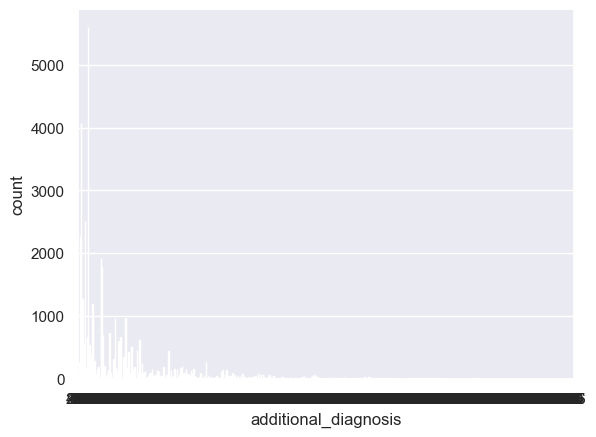

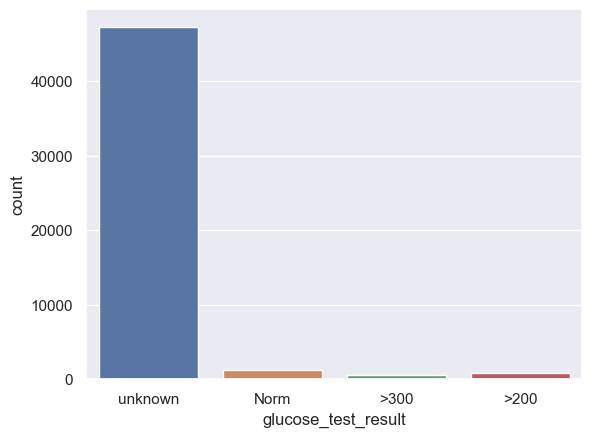

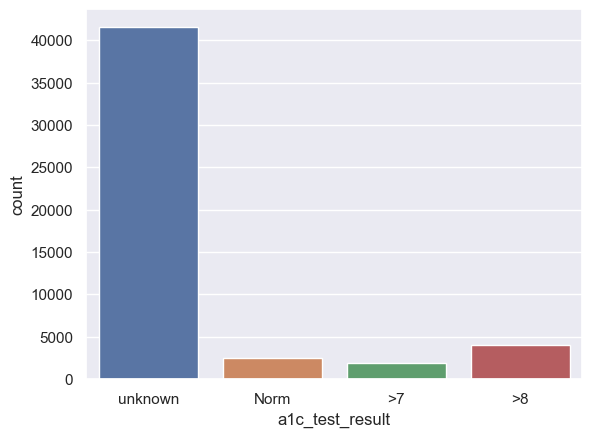

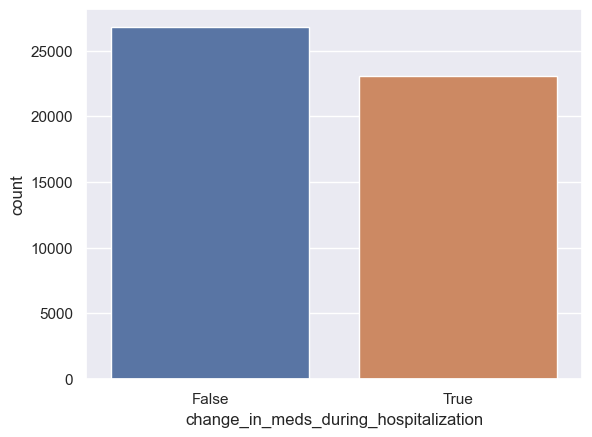

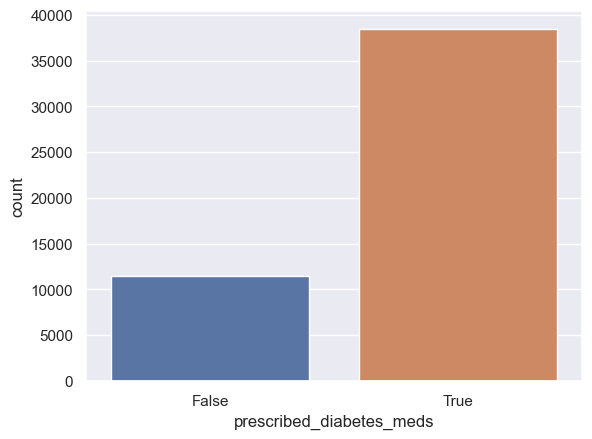

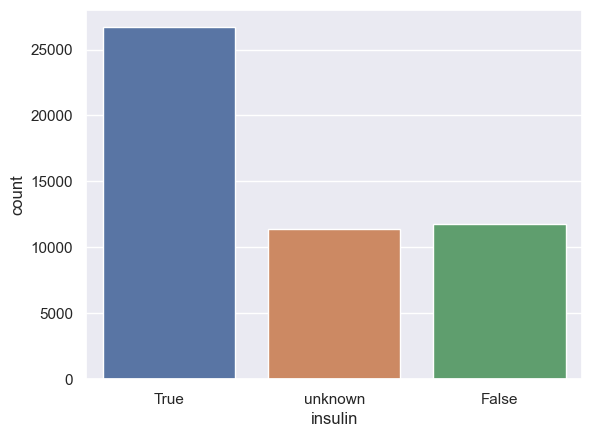

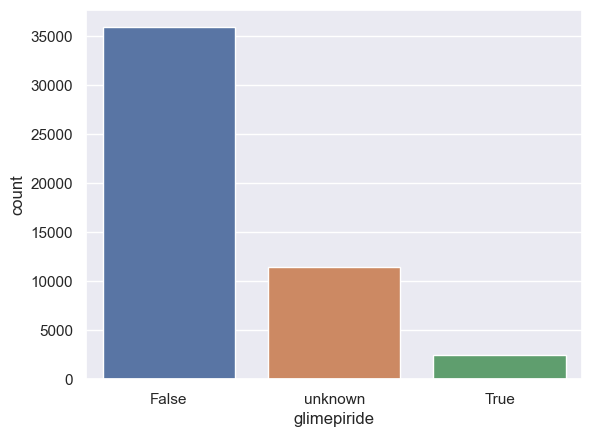

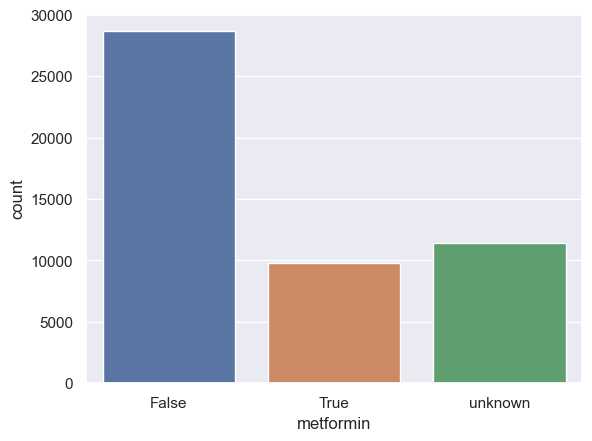

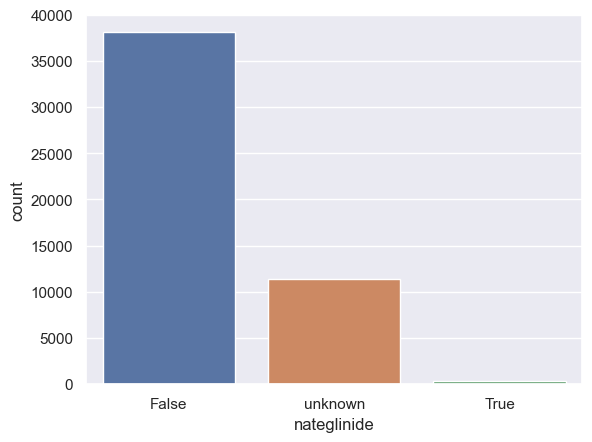

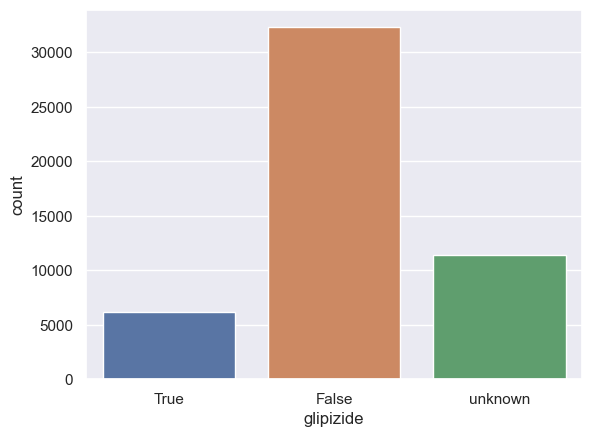

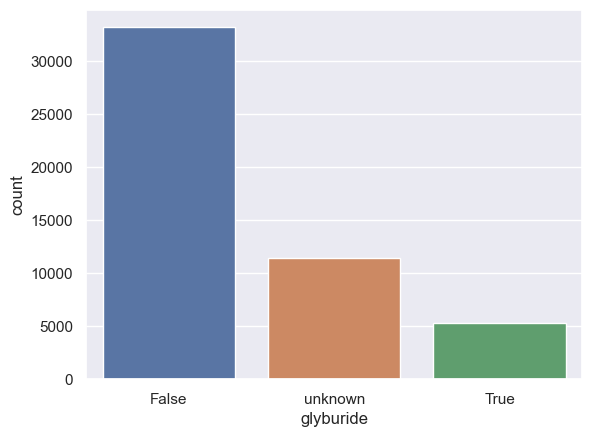

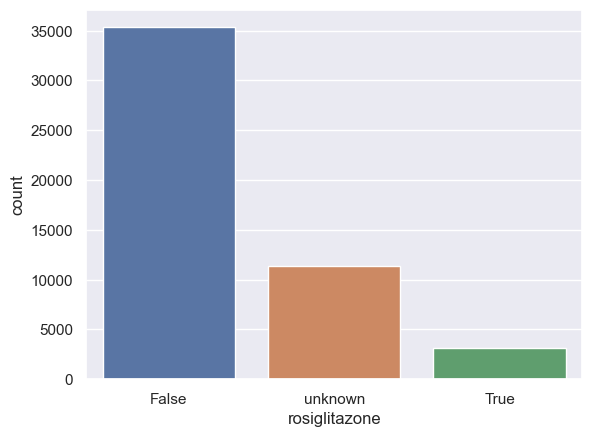

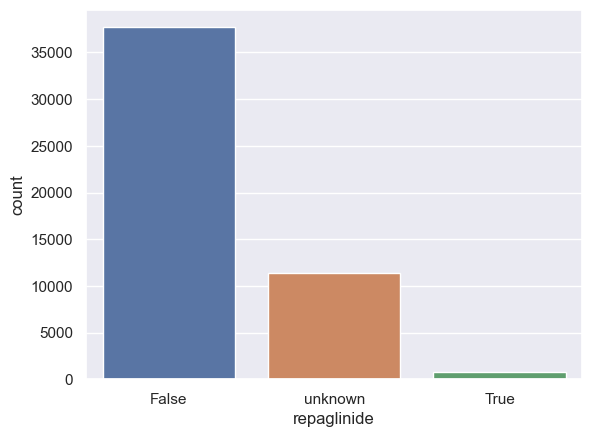

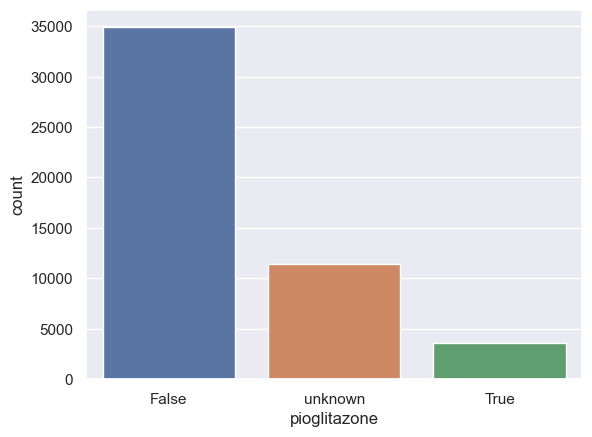

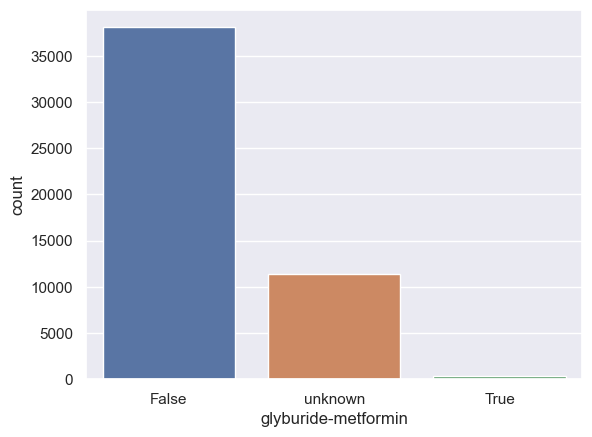

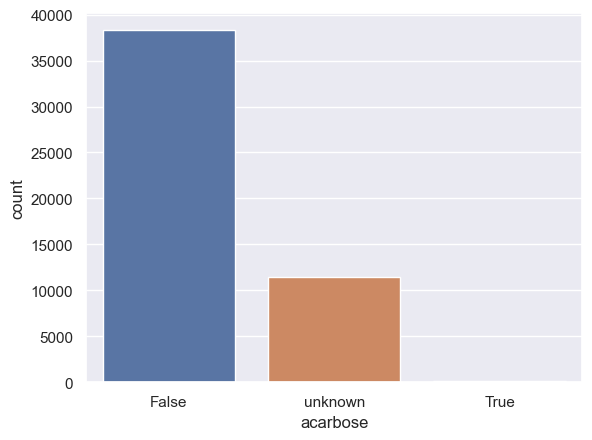

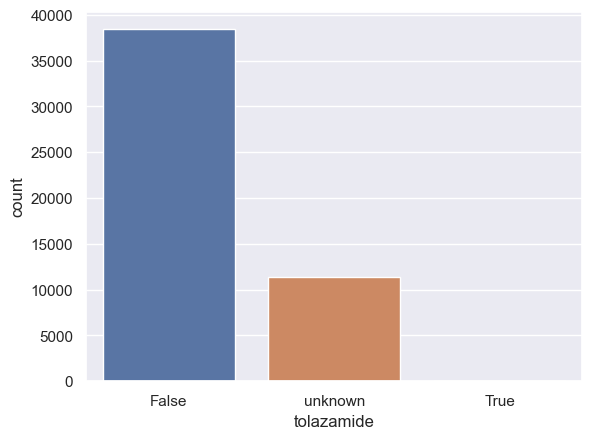

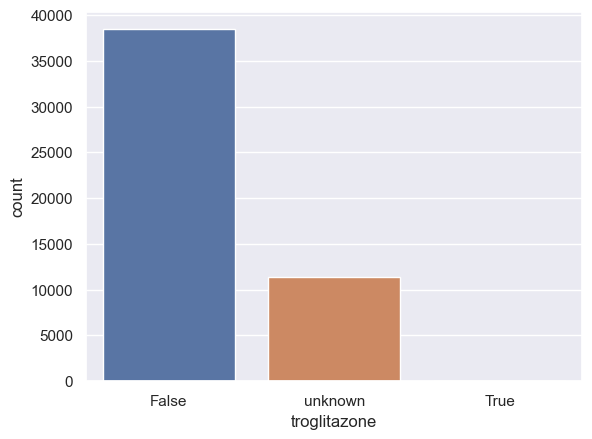

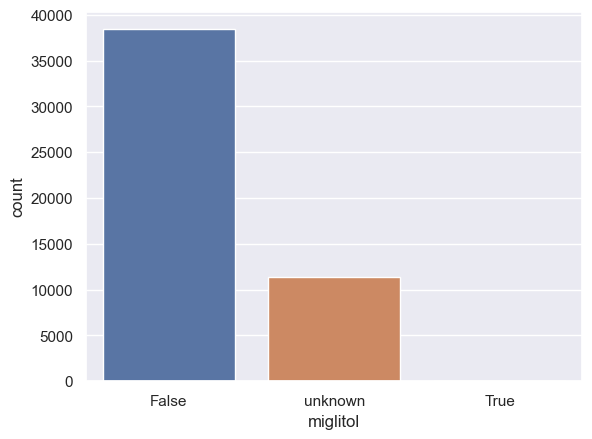

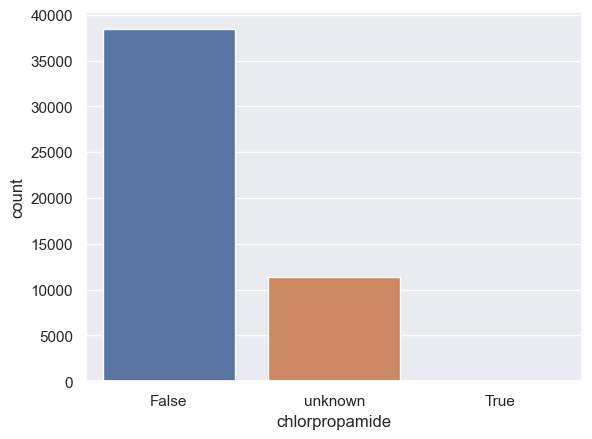

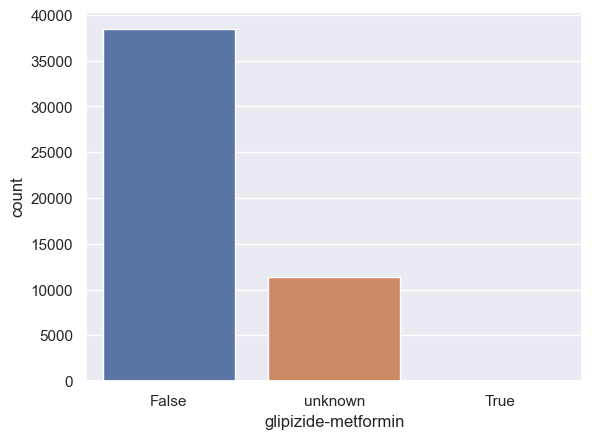

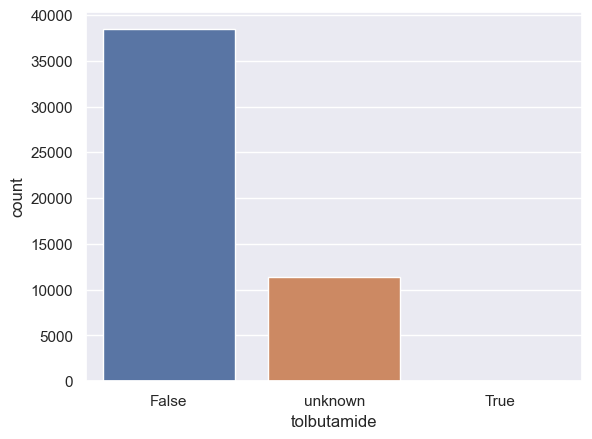

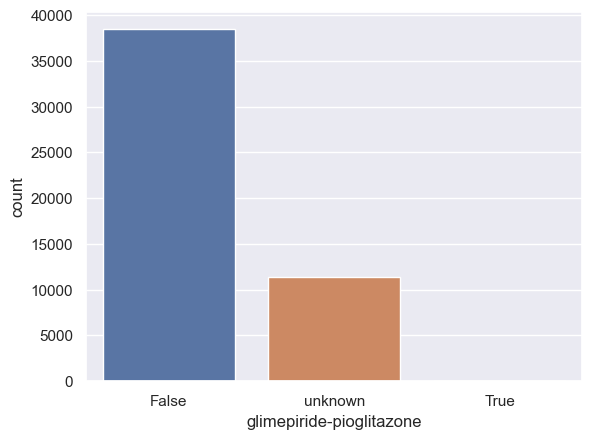

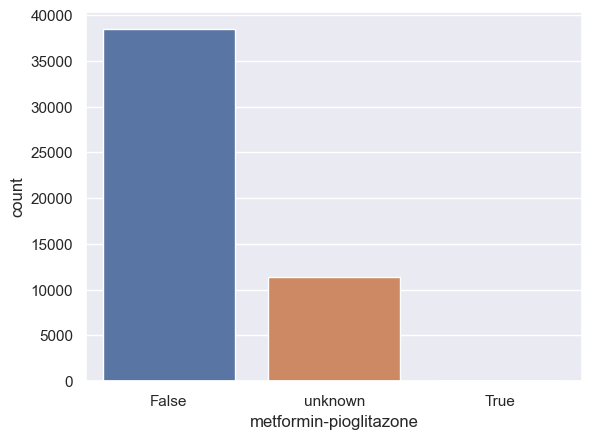

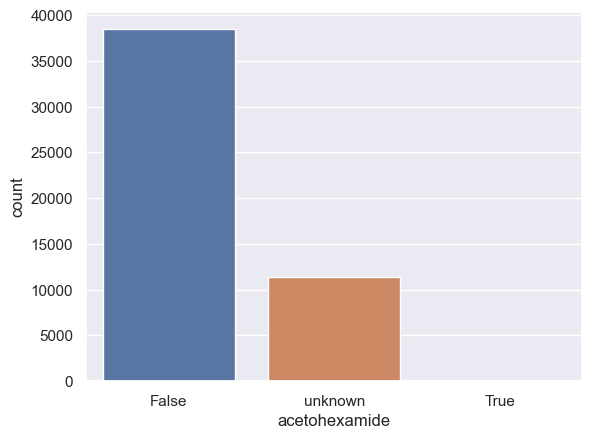

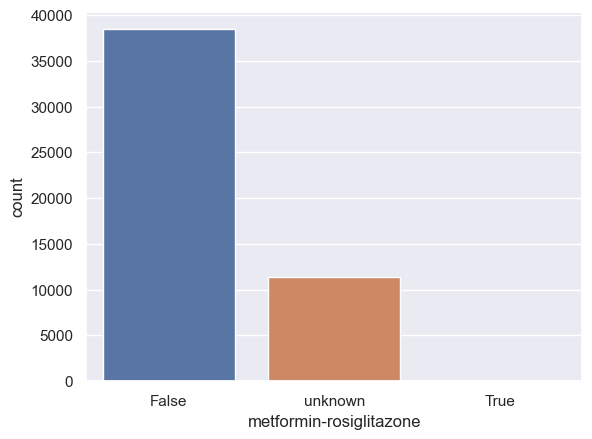

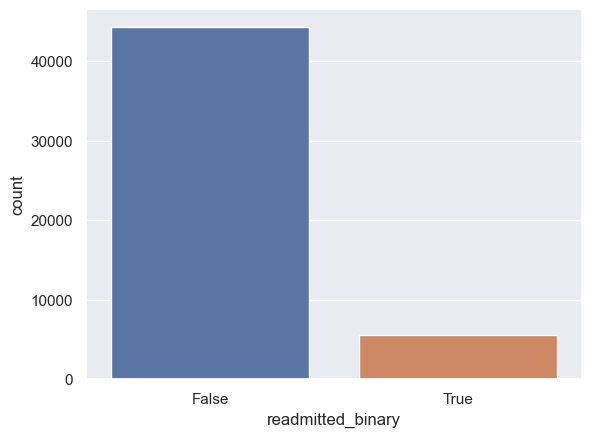

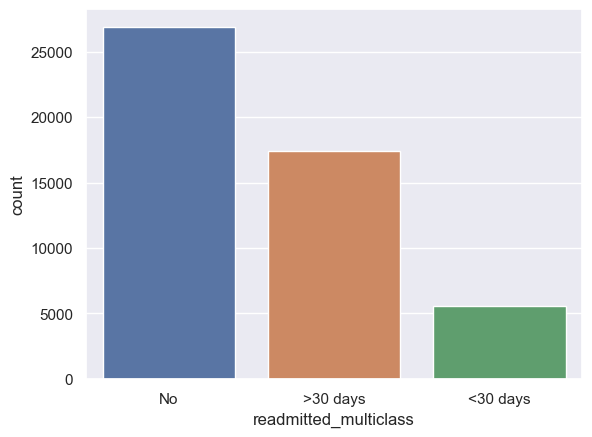

In [40]:
sns.set()

for feat in X_med_1_train_cat.columns:
    sns.countplot(x=X_med_1_train_cat[feat])
    plt.show()

sns.countplot(x=y_1_train)
plt.show()

sns.countplot(x=y_2_train)
plt.show()

In [43]:
for var in X_specs_1_train_cat:
    TestIndependence(X_specs_1_train_cat[var],y_specs_1_train, var)

race is IMPORTANT for Prediction
gender is NOT an important predictor. (Discard gender from model)
age is IMPORTANT for Prediction
weight is NOT an important predictor. (Discard weight from model)
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
Family is IMPORTANT for Prediction
GeneralPractice is IMPORTANT for Prediction
InternalMedicine is IMPORTANT for Prediction
Surgery is IMPORTANT for Prediction
General is IMPORTANT for Prediction
Radiologist is IMPORTANT for Predicti